In [1]:
import numpy as np

np.random.seed(42)
Np = 5
Nf = 4
# A is a matrix of random values representing patterns and features
A = np.random.randn(Np, Nf)
# w represents the weights of features in a linear model
w = np.random.randn(Nf)
# y is the output of the linear model (matrix multiplication of A and w)
y = A @ w
# ATA is the product of the transpose of A and A, representing the covariance matrix
ATA = A.T @ A
# ATAinv is the inverse of the covariance matrix (correlation between features)
ATAinv = np.linalg.inv(ATA)
# ATy is the product of the transpose of A and y, showing correlation between features and output
ATy = A.T @ y
# w_hat is the estimated weights obtained through the Linear Least Squares (LLS) method
w_hat = ATAinv @ ATy
# Alternatively, w_hat can be calculated using the pseudo-inverse of A (pinv)
w_hat_pinv = np.dot(np.linalg.pinv(A), y)
# Print the estimated weights obtained by the LLS method
print('Estimated Vector w using LLS method: ', w_hat)
print('Estimated Vector w using Pseudo-inverse: ', w_hat_pinv)
# Calculate the error of the linear model
e = y - A @ w_hat
# Print the square error (used to evaluate the performance of the model)
print('Square Error ||y - A * w_hat||^2: ', np.linalg.norm(e)**2)

Estimated Vector w using LLS method:  [ 1.46564877 -0.2257763   0.0675282  -1.42474819]
Estimated Vector w using Pseudo-inverse:  [ 1.46564877 -0.2257763   0.0675282  -1.42474819]
Square Error ||y - A * w_hat||^2:  1.4248800100554526e-29


In [2]:
A, w, w_hat, y, e, ATA, ATAinv, ATy

(array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
        [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
        [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
        [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
        [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ]]),
 array([ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819]),
 array([ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819]),
 array([-1.36697149, -1.27708386, -0.1783279 ,  1.47124257,  0.39545562]),
 array([ 1.55431223e-15, -4.44089210e-16,  2.22044605e-15, -2.22044605e-15,
         1.33226763e-15]),
 array([[ 1.60633157, -1.04979303,  0.67181079,  2.08983402],
        [-1.04979303,  4.12770121,  2.30417086, -0.0109509 ],
        [ 0.67181079,  2.30417086,  6.92801877,  4.6665247 ],
        [ 2.08983402, -0.0109509 ,  4.6665247 ,  5.43624922]]),
 array([[ 2.76781168,  0.18948535,  0.91280645, -1.84719747],
        [ 0.18948535,  0.44851357, -0.28233295,  0.17041757],
        [ 0.

Matplotlib is building the font cache; this may take a moment.


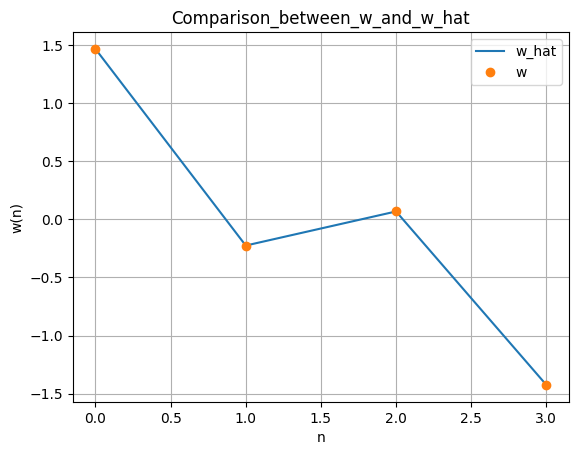

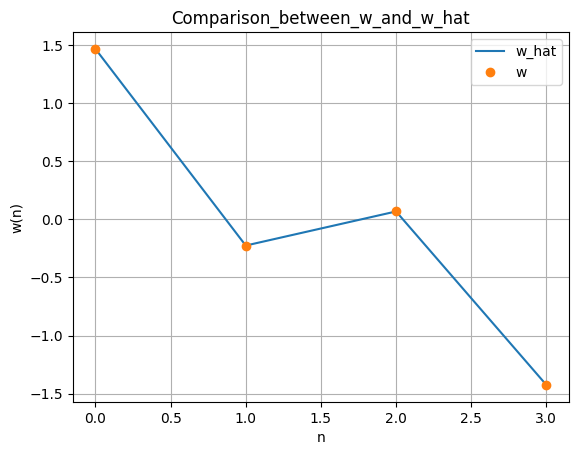

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(w_hat, label='w_hat')
plt.plot(w, 'o', label= 'w')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.legend()
plt.grid()
plt.title('Comparison_between_w_and_w_hat')
plt.show()


plt.figure()
plt.plot(w_hat_pinv, label='w_hat')
plt.plot(w, 'o', label= 'w')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.legend()
plt.grid()
plt.title('Comparison_between_w_and_w_hat')
plt.show()



LLS _:
the_optimum_weight_vector_is:_
[-1.59442766 -0.59937502  0.0052437   0.04698059]


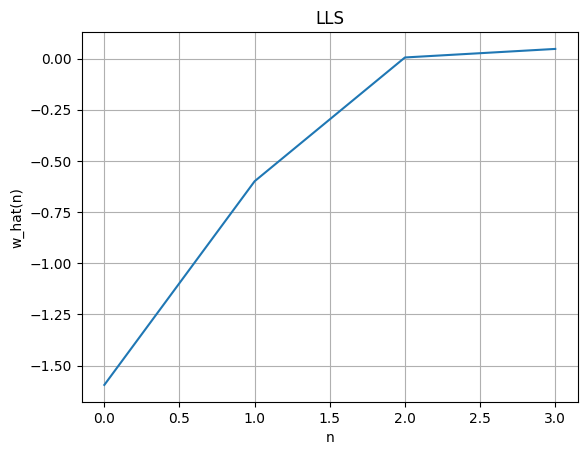

In [57]:


class SolveMinProbl: # Solve the minimization problem using the Linear Least Squares (LLS) method
    def __init__(self, y=np.ones((3,)), A=np.eye(3)):
        self.matr = A # A is a matrix of random values representing patterns and features
        self.Np = y.shape[0] # Np is the number of patterns
        self.Nf = A.shape[1] # Nf is the number of features
        self.vect = y # y is the output of the linear model (matrix multiplication of A and w)
        self.sol = np.zeros((self.Nf,), dtype=float) # w_hat is the estimated weights obtained through the Linear Least Squares (LLS) method

    def plot_w_hat(self, title='Solution'):
        w_hat = self.sol
        n = np.arange(self.Nf)
        plt.figure()
        plt.plot(n, w_hat)
        plt.xlabel('n')
        plt.ylabel('w_hat(n)') # w_hat is the estimated weights obtained through the Linear Least Squares (LLS) method
        plt.title(title)
        plt.grid()
        plt.show()

    def print_result(self, title):
        print(title, '_:')
        print('the_optimum_weight_vector_is:_')
        print(self.sol)

class SolveLLS(SolveMinProbl): # Linear Least Squares (LLS) method
    def __init__(self, y=np.ones((3,)), A=np.eye(3)): # y is the output of the linear model (matrix multiplication of A and w)
          super().__init__(y, A)

    def run(self): # Calculate the estimated weights obtained through the Linear Least Squares (LLS) method
        A = self.matr # A is a matrix of random values representing patterns and features
        y = self.vect # y is the output of the linear model (matrix multiplication of A and w)
        w_hat = np.linalg.inv(A.T @ A) @ (A.T @ y) # w_hat is the estimated weights obtained through the Linear Least Squares (LLS) method
        self.sol = w_hat # w_hat is the estimated weights obtained through the Linear Least Squares (LLS) method
        self.min = np.linalg.norm(A @ w_hat - y) ** 2 # Calculate the error of the linear model

if __name__ == "__main__":
    np.random.seed(42)
    Np = 100
    Nf = 4
    A = np.random.randn(Np, Nf)
    w = np.random.randn(Nf, )
    y = A @ w
    m = SolveLLS(y, A)
    m.run()
    m.print_result('LLS')
    m.plot_w_hat('LLS')


Grad _:
the_optimum_weight_vector_is:_
[-1.59442742 -0.59937499  0.00524369  0.04698059]


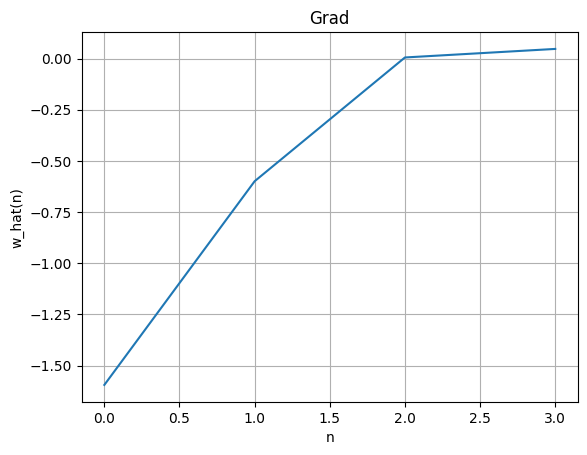

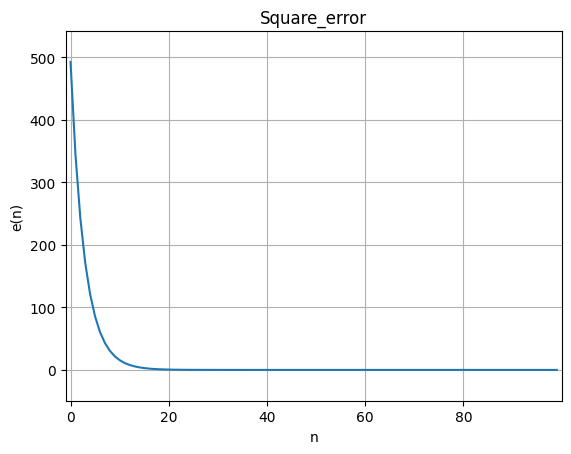

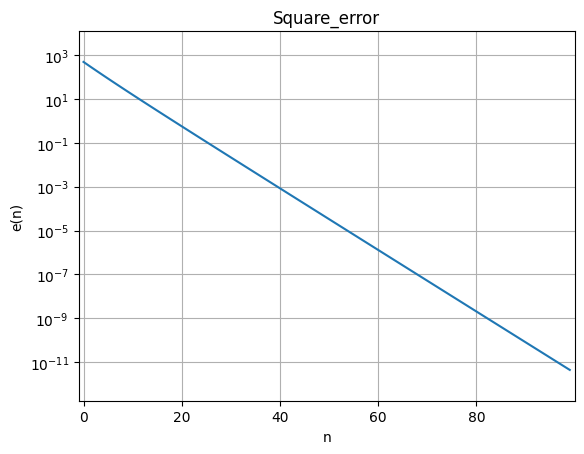

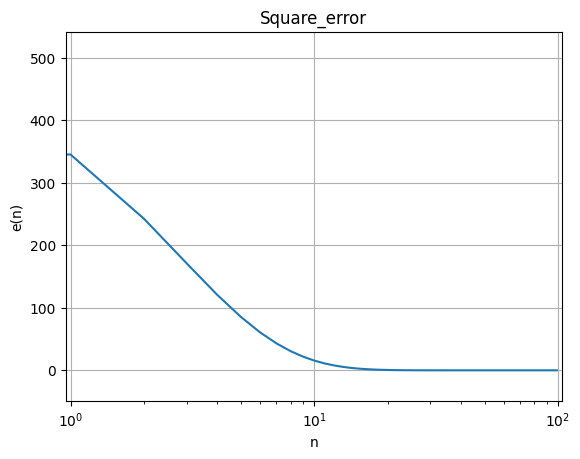

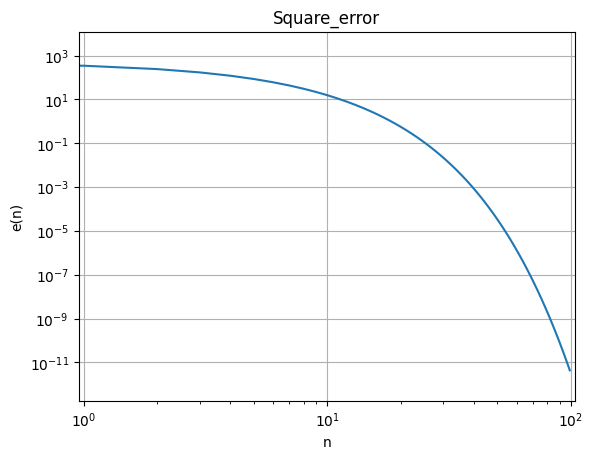

In [60]:
class SolveGrad(SolveMinProbl):

  def run(self, gamma=1e-3, Nit=100):
    self.err=np.zeros((Nit, 2), dtype=float) # Create an array to store the error
    self.gamma=gamma # Step size
    self.Nit=Nit # Number of iterations
    A=self.matr # A is a matrix of random values representing patterns and features
    y=self.vect # y is the output of the linear model (matrix multiplication of A and w)
    w=np.random.rand(self.Nf, ) # Randomly initialize the weights
    for it in range(Nit):
      grad=2*A.T@(A@w-y) # Calculate the gradient
      w= w- gamma * grad # Update the weights
      self.err[it, 0]=it # Store the iteration number
      self.err[it, 1]= np.linalg.norm(A@w-y)**2 # Store the error
      self.sol=w # Store the estimated weights
      self.min=self.err[it, 1] # Store the minimum error
  def plot_err(self, title='Square_error', logy=0, logx= 0):
    err=self.err
    plt.figure()
    if (logy==0) & (logx==0):
      plt.plot(err[:, 0], err[:, 1])
    if (logy==1) & (logx==0):
      plt.semilogy(err[:, 0], err[:, 1])
    if (logy==0) & (logx==1):
      plt.semilogx(err[:, 0], err[:, 1])
    if (logy==1) & (logx==1):
      plt.loglog(err[:, 0], err[:, 1])
    plt.xlabel('n')
    plt.ylabel('e(n)')
    plt.title(title)
    plt.margins(0.01, 0.1)
    plt.grid()
    plt.show()
    return
  
if __name__ == "__main__":
  np.random.seed(42)
  Np=100
  Nf=4
  A=np.random.randn(Np, Nf)
  w=np.random.randn(Nf)
  y=A@w
  m=SolveGrad(y, A)
  m.run()
  m.print_result('Grad')
  m.plot_w_hat('Grad')
  m.plot_err('Square_error', 0, 0) # Plot the error 0: linear scale, 1: log scale
  m.plot_err('Square_error', 1, 0) # Plot the error 1: linear scale, 0: log scale
  m.plot_err('Square_error', 0, 1) # Plot the error 0: linear scale, 1: log scale
  m.plot_err('Square_error', 1, 1) # Plot the error 1: linear scale, 1: log scale


Theoretical Equivalence of Gradient Algorithm and LLS:

The solution obtained with the gradient algorithm may not be theoretically equal to the solution obtained with the LLS method. The gradient algorithm is an optimization technique that minimizes a cost function iteratively, whereas the LLS method provides a closed-form solution by directly solving a linear system of equations. In certain cases, the gradient algorithm may converge to the LLS solution, especially when the cost function is convex and well-behaved.
Theoretical Equivalence of Steepest Descent Algorithm and LLS:

Similar to the gradient algorithm, the solution obtained with the steepest descent algorithm may not be theoretically equal to the solution obtained with the LLS method. The steepest descent algorithm is an iterative optimization method, and its convergence depends on the choice of step sizes and convergence criteria. The LLS method, on the other hand, provides a direct solution without the need for iterative optimization.
Numerical Equality of Solutions:

Numerically, the solutions obtained using the gradient algorithm, steepest descent algorithm, and LLS method may not be exactly equal due to differences in optimization approaches and numerical precision. Convergence criteria, step sizes, and the nature of the optimization landscape can affect the final numerical results. However, in well-behaved cases, the solutions obtained using these techniques can be very close or approximately equal. Differences may arise due to the specific implementation details, floating-point precision, and the optimization path taken by the iterative algorithms.
In summary, while the theoretical equivalence is not guaranteed, especially in the context of optimization algorithms, the numerical solutions may exhibit similarities, and their closeness depends on the specific problem and algorithmic parameters.